**Tabla de contenido**

- [Examinando el modelo SARIMAX](#Examinando-el-modelo-SARIMAX)
    - [Explorando las variables exógenas del conjunto de datos de macroeconomía de EE. UU.](#Explorando-las-variables-exogenas-del-conjunto-de-datos-de-macroeconomia-de-EEUU)
    - [Advertencia para el uso de SARIMAX](#Advertencia-para-el-uso-de-SARIMAX)
- [Pronosticando el GDP real utilizando el modelo SARIMAX](#Pronosticando-el-GDP-real-utilizando-el-modelo-SARIMAX)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

En los capítulos 4 al 8, hemos construido cada vez más un modelo general que nos permite considerar patrones más complejos en series temporales. Comenzamos nuestro viaje con los procesos autorregresivos y de media móvil antes de combinarlos en el modelo ARMA. Luego añadimos una capa de complejidad para modelar series temporales no estacionarias, lo que nos llevó al modelo ARIMA. Finalmente, en el capítulo 8 añadimos otra capa al ARIMA que nos permite considerar patrones estacionales en nuestras previsiones, lo que dio como resultado el modelo SARIMA.

Hasta ahora, cada modelo que hemos explorado y utilizado para producir pronósticos ha considerado únicamente la serie temporal en sí. En otras palabras, se utilizaron los valores pasados de la serie temporal como predictivos de los valores futuros. Sin embargo, es posible que las variables externas también tengan un impacto en nuestra serie temporal y, por lo tanto, puedan ser buenos predictivos de los valores futuros.

Esto nos lleva al modelo SARIMAX. Notarás la adición del término X, que denota variables exógenas. En estadística, el término exógeno se utiliza para describir predictores o variables de entrada, mientras que endógeno se utiliza para definir la variable objetivo, que es lo que estamos tratando de predecir. Con el modelo SARIMAX, ahora podemos considerar variables externas, o variables exógenas, al predecir una serie temporal.

Como ejemplo orientador, utilizaremos un conjunto de datos de macroeconomía de los Estados Unidos, recopilado trimestralmente desde 1959 hasta 2009, para pronosticar el producto interno bruto (GDP) real.

El GDP es el valor total de mercado de todos los bienes y servicios terminados producidos dentro de un país. El GDP real es una medida ajustada por inflación que elimina el impacto de la inflación en el valor de mercado de los bienes. La inflación o deflación pueden respectivamente aumentar o disminuir el valor monetario de los bienes y servicios, lo que aumenta o disminuye el GDP. Al eliminar el efecto de la inflación, podemos determinar mejor si una economía experimentó una expansión de la producción.

Sin entrar en las especificidades de medir el GDP, definiremos el GDP como la suma del consumo C, el gasto del gobierno G, las inversiones I y las exportaciones netas NX, como se muestra en la siguiente ecuación.
$$GDP = C + G + I + NX$$

Cada elemento de la ecuación probablemente se ve afectado por alguna variable externa. Por ejemplo, el consumo probablemente se ve afectado por la tasa de desempleo, porque si menos personas están empleadas, el consumo probablemente disminuirá. Las tasas de interés también pueden tener un impacto, ya que si aumentan, es más difícil pedir prestado dinero, y el gasto disminuye como resultado. También podemos pensar en las tasas de cambio de divisas como variables que impactan las exportaciones netas. Una moneda local más débil generalmente estimulará las exportaciones y hará que las importaciones sean más caras. Así, podemos ver cómo muchas variables exógenas pueden afectar el GDP real de los Estados Unidos.

En este capítulo, primero examinaremos el modelo SARIMAX y exploraremos una advertencia importante al usarlo para producir pronósticos. Luego aplicaremos el modelo para pronosticar el GDP real de los Estados Unidos.


# Examinando el modelo SARIMAX

El modelo SARIMAX extiende aún más el modelo $SARIMA(p,d,q) (P,D,Q)_m$ al agregar el efecto de variables exógenas. Por lo tanto, podemos expresar el valor presente $y_t$ simplemente como un modelo $SARIMA(p,d,q) (P,D,Q)_m$ al que agregamos cualquier número de variables exógenas $X_t$, como se muestra en la siguiente ecuación.
$$
y_t = SARIMA(p,d,q)(P,D,Q)_m + \sum_{i=1}^{n} \beta_i X_t^i
$$

`El modelo SARIMA es un modelo lineal, ya que es una combinación lineal de los valores pasados de la serie y de los términos de error. Aquí añadimos otra combinación lineal de diferentes variables exógenas, lo que resulta en que SARIMAX también sea un modelo lineal`. Tenga en cuenta que en SARIMAX puede incluir variables categóricas como variables exógenas, pero asegúrese de codificarlas (darles valores numéricos o indicadores binarios) al igual que lo haría en tareas de regresión tradicionales.

`Hemos estado utilizando la función SARIMAX de statsmodels desde el capítulo 4 para implementar diferentes modelos`. Esto se debe a que SARIMAX es la función más general para pronosticar una serie temporal. Ahora entiendes cómo un modelo SARIMAX sin variables exógenas es un modelo SARIMA. De manera similar, un modelo sin estacionalidad pero con variables exógenas puede denominarse modelo ARIMAX, y un modelo sin estacionalidad y sin variables exógenas se convierte en un modelo ARIMA. Dependiendo del problema, se utilizarán diferentes combinaciones de cada parte del modelo general SARIMAX.

Teóricamente, esto resume el modelo SARIMAX. Los capítulos 4 al 8 fueron ordenados de tal manera que desarrollamos el modelo SARIMAX de forma incremental, haciendo que la adición de variables exógenas sea fácil de entender. Para reforzar tu aprendizaje, exploraremos las variables exógenas de nuestro conjunto de datos.


## Explorando las variables exogenas del conjunto de datos de macroeconomia de EEUU

Carguemos el conjunto de datos de macroeconomía de EE. UU. y exploremos las diferentes variables exógenas disponibles para nosotros para predecir el GDP real. Este conjunto de datos está disponible con la biblioteca statsmodels, lo que significa que no necesitas descargar ni leer un archivo externo. Puedes cargar el conjunto de datos utilizando el módulo de conjuntos de datos de statsmodels.

In [1]:
import statsmodels.api as sm
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


Cada una de estas variables puede o no ser un buen predictor del GDP real. `No tenemos que realizar una selección de características porque el modelo lineal atribuirá un coeficiente cercano a 0 a las variables exógenas que no son significativas para predecir el objetivo.` Por el bien de la simplicidad y la claridad, solo trabajaremos con seis variables en este capítulo.

Podemos visualizar cómo se comporta cada variable a través del tiempo para ver si podemos discernir patrones distintivos. 


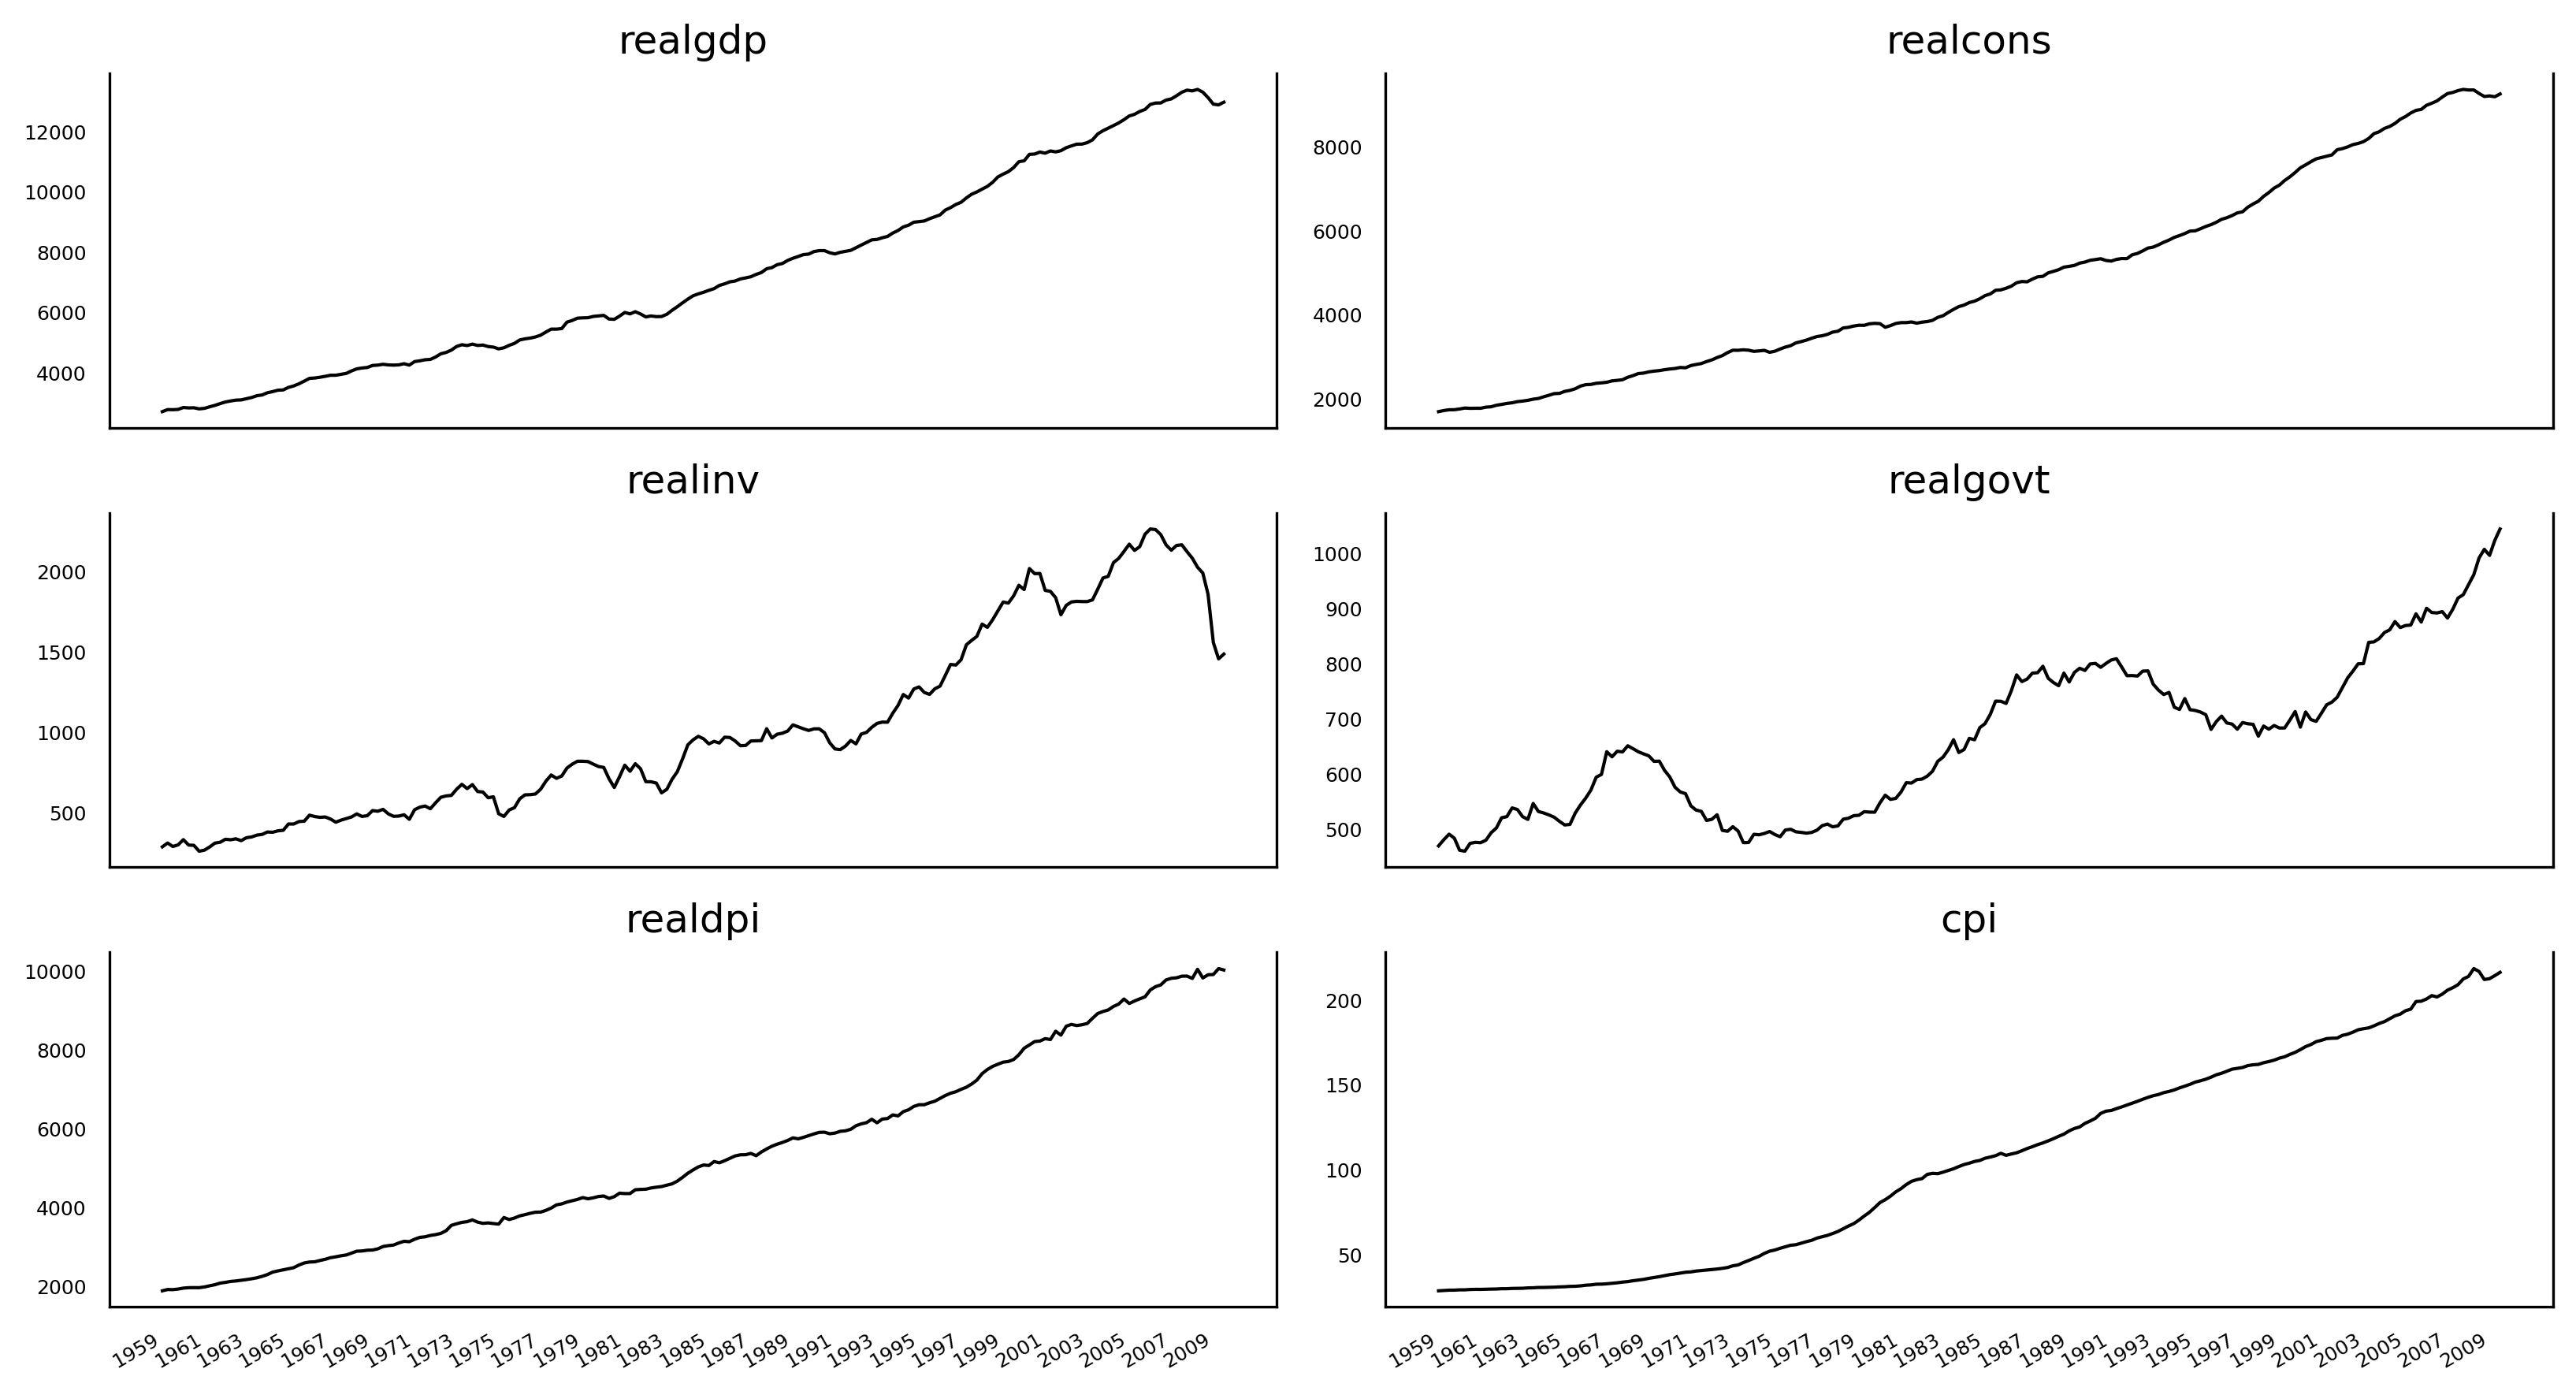

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=300, figsize=(11,6))
for i, ax in enumerate(axes.flatten()[:6]):
    data = macro_econ_data[macro_econ_data.columns[i+2]]
    ax.plot(data, color='black', linewidth=1)
    ax.set_title(macro_econ_data.columns[i+2])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.setp(axes, xticks=np.arange(0, 208, 8), xticklabels=np.arange(1959,2010, 2))
fig.autofmt_xdate()
plt.tight_layout()

`Hay dos formas de trabajar con variables exógenas para la previsión de series temporales`. 

- Primero, podríamos entrenar múltiples modelos con varias combinaciones de variables exógenas y ver qué modelo genera las mejores previsiones. 
- Alternativamente, podemos simplemente incluir todas las variables exógenas y ceñirnos a la selección del modelo utilizando el AIC, ya que sabemos que esto da como resultado un modelo que se ajusta bien y que no sobreajusta.

## Advertencia para el uso de SARIMAX

Hay una advertencia importante que viene con el uso del modelo SARIMAX. Incluir variables externas puede ser potencialmente beneficioso, ya que puede encontrar predictores fuertes para su objetivo. Sin embargo, `puede encontrar problemas al pronosticar múltiples pasos hacia el futuro.`

Recuerda que el modelo SARIMAX utiliza el modelo SARIMA(p,d,q) (P,D,Q)m y una combinación lineal de variables exógenas para predecir un paso de tiempo en el futuro. Pero, `¿qué sucede si deseas predecir dos pasos de tiempo en el futuro?` Si bien esto es posible con un modelo SARIMA, `el modelo SARIMAX requiere que también pronosticemos las variables exógenas`.

Tener que pronosticar una variable exógena para pronosticar nuestra variable objetivo puede magnificar el error de predicción de nuestra variable objetivo, lo que significa que nuestras predicciones pueden degradarse rápidamente a medida que pronosticamos más pasos en el futuro.

`La única manera de evitar esa situación es predecir solo un paso temporal en el futuro y esperar a observar la variable exógena antes de predecir el objetivo para otro paso temporal en el futuro.`

Por otro lado, si tu variable exógena es fácil de predecir, lo que significa que sigue una función conocida que puede ser predicha con precisión, no hay ningún inconveniente en pronosticar la variable exógena y utilizar estas previsiones para predecir el objetivo.

Al final, no hay una recomendación clara para predecir solo un paso de tiempo. Depende de la situación y de las variables exógenas disponibles. Aquí es donde entra en juego su experiencia como científico de datos y la experimentación rigurosa. `Si determina que su variable exógena puede preverse con precisión, puede recomendar pronosticar muchos pasos de tiempo en el futuro. De lo contrario, su recomendación debe ser predecir un paso de tiempo a la vez y justificar su decisión explicando que los errores se acumularán a medida que se hagan más predicciones, lo que significa que los pronósticos perderán precisión.`


# Pronosticando el GDP real utilizando el modelo SARIMAX

Antes de sumergirnos, debemos reintroducir el procedimiento general de modelado. No hay cambios importantes en el procedimiento. La única modificación es que ahora ajustaremos un modelo SARIMAX. Todos los demás pasos permanecen igual, como se muestra en la siguiente figura.

![Sarimax](fig/sarimax.png)

Procedimiento general de modelado para el modelo SARIMAX. Este procedimiento se puede aplicar a cualquier problema, ya que el modelo SARIMAX es el modelo de pronóstico más general y puede acomodar todos los diferentes procesos y propiedades de series temporales que hemos explorado. Observe que el único cambio aquí es que estamos ajustando un modelo SARIMAX en lugar de un modelo SARIMA como hicimos en el capítulo 8. El resto del procedimiento permanece igual.

Siguiendo el procedimiento de modelado de la anterior figura, primero verificaremos la estacionariedad de nuestro objetivo utilizando la prueba de Dickey-Fuller aumentada (ADF).

1. Define la variable objetivo. En este caso, es el `realgdp`.
2. Defina las variables exógenas. Aquí lo limitamos a cinco variables por simplicidad.

In [3]:
from statsmodels.tsa.stattools import adfuller

target = macro_econ_data['realgdp'] #1
exog = macro_econ_data[['realcons', 'realinv', 'realgovt', 'realdpi','cpi']] #2
ad_fuller_result = adfuller(target)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.7504627967647144
p-value: 0.9982455372335032


Esto devuelve una estadística ADF de 1.75 y un valor p de 1.00. Dado que la estadística ADF no es un número negativo grande y el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula y concluimos que la serie no es estacionaria.

Por lo tanto, debemos aplicar una transformación y probar la estacionariedad nuevamente. Aquí diferenciaremos la serie una vez:


In [4]:
target_diff = target.diff()
ad_fuller_result = adfuller(target_diff[1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.305695561658106
p-value: 3.327882187668224e-08


Esto ahora devuelve una estadística ADF de -6.31 y un valor p de 3.32 × 10–8. Con una gran estadística ADF negativa y un valor p menor que 0.05, podemos rechazar la hipótesis nula y concluir que la serie es ahora estacionaria. Por lo tanto, sabemos que d = 1. Dado que no necesitábamos tomar una diferencia estacional para hacer que la serie fuera estacionaria, D = 0

Ahora definiremos la función optimize_SARIMAX, que ajustará todas las combinaciones únicas del modelo y devolverá un DataFrame en orden ascendente de AIC.

In [5]:
import pandas as pd
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series,list],
                      order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    results = []
    for order in tqdm(order_list):
        try:
            model = SARIMAX(
                endog,
                exog, # variables exogenas
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True)
    return result_df

A continuación, definiremos el rango de valores posibles para los pedidos p, q, P y Q. Probaremos valores del 0 al 3, pero siéntete libre de probar un conjunto diferente de valores. Además, `dado que los datos se recopilan trimestralmente, m = 4.`

In [6]:
from itertools import product
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = 4 # Recuerda que s en la implementación de SARIMAX de statsmodels es equivalente a m.
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

Para entrenar el modelo, utilizaremos las primeras 200 instancias tanto de las variables objetivo como de las exógenas. Luego, ejecutaremos la función optimize_SARIMAX y seleccionaremos el modelo con el AIC más bajo.

In [7]:
target_train = target[:200]
exog_train = exog[:200]
result_df = optimize_SARIMAX(target_train, exog_train, parameters_list, d,D, s)
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

,"(p,q,P,Q)",AIC
0,"(3, 3, 0, 0)",1742.824646
1,"(3, 3, 1, 0)",1744.966381
2,"(3, 3, 0, 1)",1744.998848
3,"(2, 2, 0, 0)",1745.514931
4,"(2, 2, 0, 1)",1746.079566
...,...,...
251,"(0, 2, 0, 0)",1761.579044
252,"(0, 3, 0, 0)",1762.317095
253,"(0, 0, 0, 0)",1764.754980
254,"(1, 0, 0, 0)",1765.379412


Una vez completado, la función devuelve el veredicto de que el modelo $SARIMAX(3,1,3)(0,0,0)_4$ es el modelo con el AIC más bajo. Observe que el componente estacional del modelo solo tiene órdenes de 0. Esto tiene sentido, ya que no hay un patrón estacional visible en la representación del PIB real, como se muestra en la figura 9.4. Por lo tanto, el componente estacional es nulo, y tenemos un modelo ARIMAX(3,1,3).

Ahora podemos ajustar el modelo seleccionado y mostrar una tabla resumen para ver los coeficientes asociados a nuestras variables exógenas.

In [9]:
best_model = SARIMAX(target_train, exog_train, order=(3,1,3),seasonal_order=(0,0,0,4), simple_differencing=False)
best_model_fit = best_model.fit(disp=False)
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  200
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -859.412
Date:                Wed, 02 Jul 2025   AIC                           1742.825
Time:                        15:51:04   BIC                           1782.344
Sample:                             0   HQIC                          1758.819
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
realcons       0.9708      0.045     21.494      0.000       0.882       1.059
realinv        1.0132      0.033     30.688      0.000       0.948       1.078
realgovt       0.7288      0.127      5.731      0.0

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


En la figura, notará que todas las variables exógenas tienen un valor p menor que 0.05, excepto realdpi, que tiene un valor p de 0.6799. Esto significa que el coeficiente de realdpi no es significativamente diferente de 0. También notarás que su coeficiente es 0.0103. Sin embargo, el coeficiente se mantiene en el modelo, ya que el valor p no determina la relevancia de este predictor para pronosticar nuestro objetivo.

Continuando con el procedimiento de modelado, ahora estudiaremos los residuos del modelo

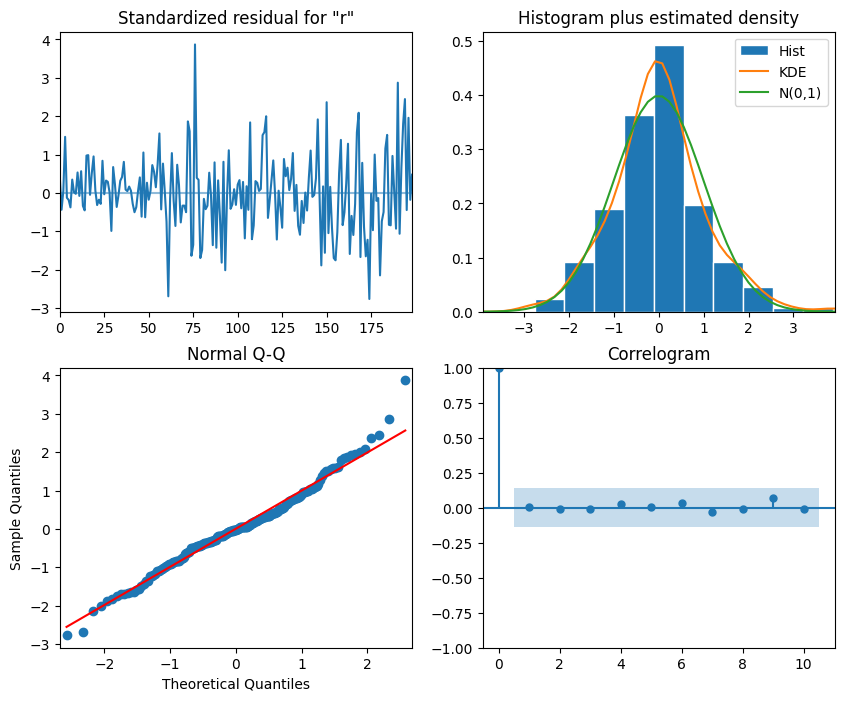

In [10]:
best_model_fit.plot_diagnostics(figsize=(10,8));

Figura. Análisis residual del modelo seleccionado. Puede ver que los residuos no tienen tendencia y una variación bastante constante a lo largo del tiempo, al igual que el ruido blanco. En la gráfica superior derecha, la distribución de residuos está muy cerca de una distribución normal. Esto se ve respaldado además por la gráfica Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y= x. Finalmente, el correlograma no muestra coeficientes significativos después del retraso 0, al igual que el ruido blanco. Por lo tanto, a partir de un análisis gráfico, los residuos de este modelo se asemejan al ruido blanco.

Ahora aplicaremos la prueba de Ljung-Box para asegurarnos de que los residuos no sean
correlacionado. Por lo tanto, queremos ver valores p mayores que 0.05, ya quela hipótesis nula de la prueba de la caja de Ljung es que los residuos son independientes y sin correlación.

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = best_model_fit.resid
lb_test = acorr_ljungbox(residuals, lags=np.arange(1, 11))  
# Extraer solo los p-values como array
pvalue = lb_test["lb_pvalue"].values
print(pvalue)

[0.76311067 0.90615852 0.97772505 0.8683093  0.93902882 0.97238092
 0.98305739 0.99290597 0.99347019 0.99725142]


Todos los valores p son mayores que 0,05. Por lo tanto, no rechazamos la hipótesis nula, y concluimos que los residuos son independientes y no están correlacionados. Habiendo superado ambas verificaciones residuales, nuestro modelo puede usarse para pronosticar.

`Como se mencionó antes, la advertencia de usar un modelo SARIMAX es que es razonable predecir solo el siguiente paso de tiempo, para evitar predecir también las variables exógenas, lo que nos llevaría a acumular errores de predicción en la pronóstico final.`

En lugar de eso, para probar nuestro modelo, predecimos el siguiente instante de tiempo varias veces y promediamos los errores de cada predicción. Esto se hace utilizando la función rolling_forecast, que definimos y utilizamos en los capítulos 4-6. Como modelo de referencia, utilizaremos el método del último valor conocido.

In [12]:
def rolling_forecast(endog: Union[pd.Series, list], exog: Union[pd.Series, list], 
                     train_len: int, horizon: int, window: int,method: str) -> list:
    total_len = train_len + horizon
    if method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(3,1,3),
                            seasonal_order=(0,0,0,4), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
        return pred_SARIMAX


La función recursive_forecast nos permite predecir el siguiente intervalo de tiempo durante un período determinado. Específicamente, la utilizaremos para pronosticar el siguiente intervalo de tiempo comenzando en 2008 y llegando al tercer trimestre de 2009.

1. Ajustamos el modelo con los datos desde 1959 hasta finales de 2007.
2. El conjunto de pruebas contiene los valores desde 2008 hasta el tercer trimestre de 2009. Hay un total de siete valores para predecir.
3. Esto especifica que solo predecimos el siguiente paso de tiempo.

In [13]:
target_train = target[:196] #1
target_test = target[196:] #2
pred_df = pd.DataFrame({'actual': target_test})
TRAIN_LEN = len(target_train)
HORIZON = len(target_test)
WINDOW = 1 #3

pred_last_value = rolling_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_SARIMAX = rolling_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW,'SARIMAX')

pred_df['pred_last_value'] = pred_last_value
pred_df['pred_SARIMAX'] = pred_SARIMAX
pred_df

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

,actual,pred_last_value,pred_SARIMAX
196,13366.865,13391.249,13344.062225
197,13415.266,13366.865,13373.512078
198,13324.600,13415.266,13378.786306
199,13141.920,13324.600,13327.759560
200,12925.410,13141.920,13133.230193
201,12901.504,12925.410,12887.624670
202,12990.341,12901.504,12873.793673


Con las predicciones realizadas, podemos visualizar qué modelo tiene el menor error porcentual absoluto medio (MAPE).

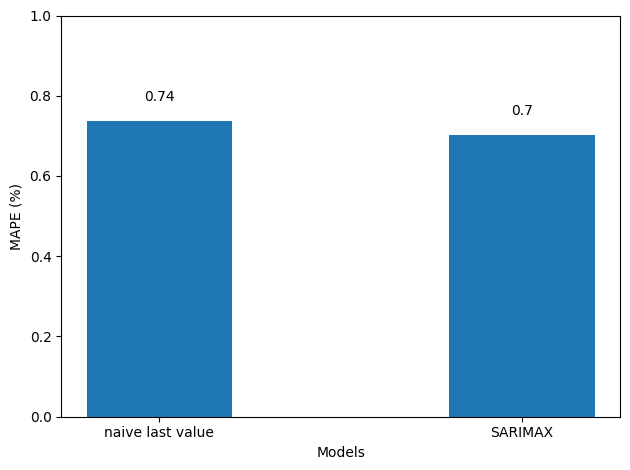

In [15]:
import matplotlib.pyplot as plt

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_last = mape(pred_df.actual, pred_df.pred_last_value)
mape_SARIMAX = mape(pred_df.actual, pred_df.pred_SARIMAX)

fig, ax = plt.subplots()
x = ['naive last value', 'SARIMAX']
y = [mape_last, mape_SARIMAX]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')
    plt.tight_layout()

En la figura 9.7 verás que el modelo SARIMAX es el modelo ganador por solo un 0.04%. Apreciarás la importancia de una línea base aquí, ya que ambos métodos logran un MAPE extremadamente bajo, lo que demuestra que el modelo SARIMAX es solo un poco mejor que simplemente predecir el último valor. `Aquí es donde entra en juego el contexto empresarial`. En nuestro caso, dado que estamos prediciendo el GDP de los Estados Unidos, una diferencia del 0.04% representa miles de dólares. Esta diferencia podría ser relevante en este contexto particular, justificando el uso del modelo SARIMAX, aunque solo sea ligeramente mejor que la línea base.

# Proximos pasos

En este capítulo, cubrimos el modelo SARIMAX, que nos permite incluir variables externas al pronosticar nuestra serie temporal objetivo. La adición de variables exógenas viene con una advertencia: si necesitamos predecir muchos pasos hacia el futuro, también debemos predecir las variables exógenas, lo que puede amplificar el error de predicción en el objetivo. Para evitar eso, debemos predecir solo el próximo paso de tiempo.

En una situación donde deseamos mostrar que dos variables que varían en el tiempo pueden influirse mutuamente, debemos utilizar el modelo de autoregresión vectorial (VAR). Este modelo permite la previsión de series temporales multivariantes, a diferencia del modelo SARIMAX, que es para la previsión de series temporales univariantes. En el próximo capítulo exploraremos el modelo VAR en detalle, y verás que también puede ser extendido para convertirse en un modelo VARMA y un modelo VARMAX.

# Resumen

- El modelo SARIMAX te permite incluir variables externas, también llamadas variables exógenas, para predecir tu objetivo.
- Las transformaciones se aplican solo a la variable objetivo, no a las variables exógenas.
- Si deseas pronosticar múltiples intervalos de tiempo en el futuro, las variables exógenas también deben ser pronosticadas. Esto puede magnificar los errores en el pronóstico final. Para evitar eso, debes predecir solo el siguiente intervalo de tiempo.

